In [1]:
import os
import matplotlib.image as mpimg
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

In [2]:
dataset_path = './Downloads/part1/'

In [3]:
x = os.listdir(dataset_path)

In [4]:
# Containers + process image data
images = []
genders = []
ages = []
eth = []

for f in os.listdir(dataset_path):
    if f.endswith('.jpg'):
        parts = f.split('_')
        if len(parts) < 4:
            print(f"Skipped file not in format: {f}")
            continue

        age, gender, e, _ = parts
        try:
            age = int(age)
            gender = int(gender)
            e = int(e)
        except ValueError:
            print(f"Skip incorrect label: {f}")
            continue

        image_path = os.path.join(dataset_path, f)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Unreadable image: {f}")
            continue

        image = cv2.resize(image, (96, 96))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image / 255.0  

        images.append(image)
        ages.append(age)
        genders.append(gender)
        eth.append(e)


Corrupt JPEG data: premature end of data segment


Skipped file not in format: 61_1_20170109142408075.jpg


Corrupt JPEG data: bad Huffman code


Skipped file not in format: 61_3_20170109150557335.jpg


libpng warning: iCCP: known incorrect sRGB profile


In [5]:
# Convert
X = np.array(images)
y_age = np.array(ages)
y_gender = np.array(genders)
y_ethnicity = np.array(eth)

In [6]:

# Split data
X_temp, X_test, age_temp, age_test, gender_temp, gender_test, eth_temp, eth_test = train_test_split(X, y_age, y_gender, y_ethnicity, test_size=0.15, random_state=42)

# Split into val
X_train, X_val, age_train, age_val, gender_train, gender_val, eth_train, eth_val = train_test_split(X_temp, age_temp, gender_temp, eth_temp, test_size=0.1765, random_state=42 )

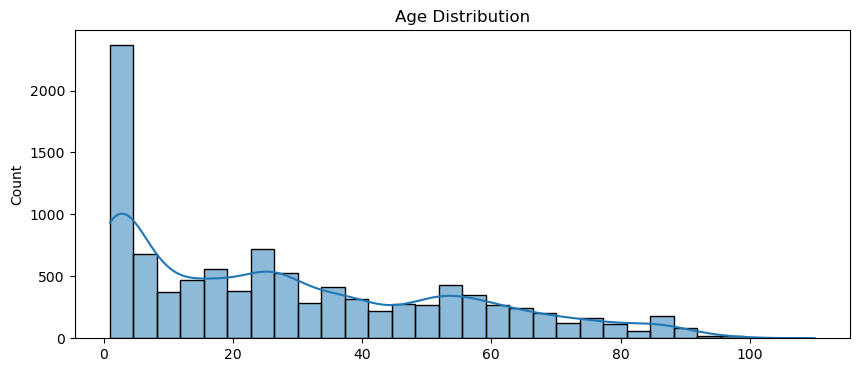

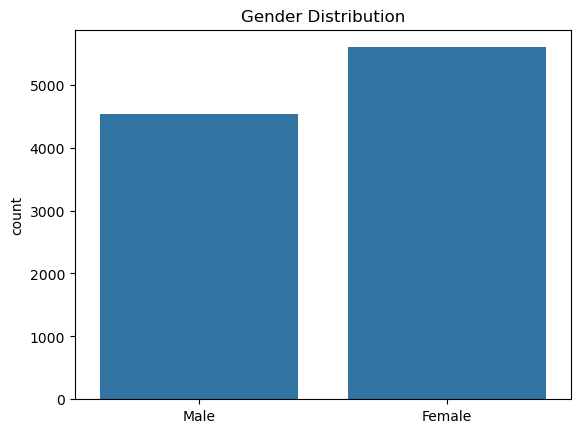

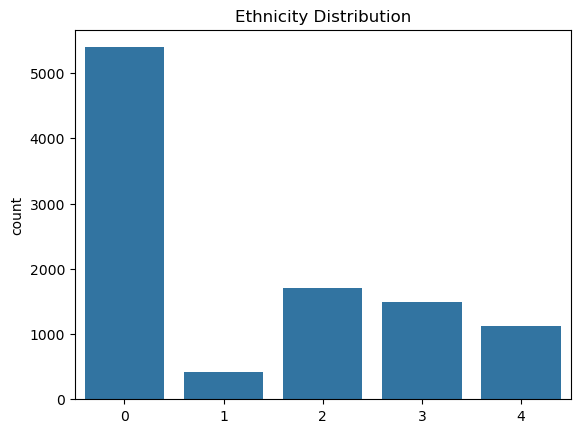

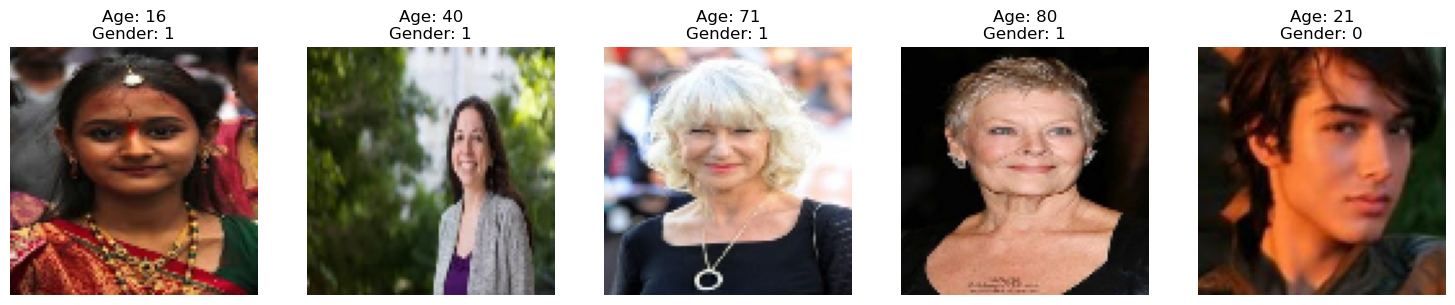

In [7]:
# Age 
plt.figure(figsize=(10, 4))
sns.histplot(y_age, bins=30, kde=True)
plt.title("Age Distribution")
plt.show()
# Gender 
sns.countplot(x=y_gender)
plt.title("Gender Distribution")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Ethnicity 
sns.countplot(x=y_ethnicity)
plt.title("Ethnicity Distribution")
plt.show()

# sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X[i])
    axes[i].set_title(f"Age: {y_age[i]}\nGender: {y_gender[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [8]:
#Exploratory Data Analysis (EDA) Part 3
#Discuss any potential biases in the dataset and how they might affect model performance:

# We ran this project using part1 of the UTK dataset, in this we can see a heavy imbalance of ethnicity 0, ages less than approx. 2 and inequal gender distribution.
# This will skewer the learning process
# into favoring these ranges more than the others, leading to higher successes in those two ranges. In turn the rest of the data will be less accurate when
#trained. Since ethnicity 0 and ages 0 -1 are abbundant, the models will be more accurate when tested against them.

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')

def create_cnn_model(input_shape=(96,96, 3), output_units = 1, activation=None):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation= 'relu', input_shape = input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation= 'relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation= 'relu'),
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(output_units, activation= activation)
    ])
    return model

input_shape = X_train.shape[1:]


age_model = create_cnn_model(input_shape, output_units=1)
age_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])

gender_model = create_cnn_model(input_shape, output_units=1, activation = 'sigmoid')
gender_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

eth_model = create_cnn_model(input_shape, output_units=5, activation = 'softmax')
eth_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# CNN Model - Age
age_history = age_model.fit(
    X_train, age_train,
    validation_data=(X_val, age_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 734.5474 - mae: 21.9929 - val_loss: 557.8130 - val_mae: 20.0441
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 515.4349 - mae: 18.3467 - val_loss: 480.9524 - val_mae: 17.4206
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 471.0005 - mae: 17.2946 - val_loss: 427.8906 - val_mae: 16.1832
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 453.5777 - mae: 16.6717 - val_loss: 421.0721 - val_mae: 16.2219
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 401.8560 - mae: 15.4945 - val_loss: 424.6005 - val_mae: 16.3601
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 353.5726 - mae: 14.4525 - val_loss: 383.5887 - val_mae: 14.5718
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 323.6038 - mae: 13.7386 - val_loss: 422.8790 - val_mae: 16.3917
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 304.5171 - mae: 13.3112 - val_loss: 360.9156 - val_mae: 

In [11]:
#CNN Model - Gender
gender_history = gender_model.fit(
    X_train, gender_train,
    validation_data=(X_val, gender_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.5621 - loss: 0.7066 - val_accuracy: 0.5838 - val_loss: 0.6658
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.6364 - loss: 0.6309 - val_accuracy: 0.6811 - val_loss: 0.5809
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.7037 - loss: 0.5603 - val_accuracy: 0.6989 - val_loss: 0.5752
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.7203 - loss: 0.5337 - val_accuracy: 0.7015 - val_loss: 0.6096
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.7710 - loss: 0.4690 - val_accuracy: 0.7022 - val_loss: 0.5588
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.7917 - loss: 0.4191 - val_accuracy: 0.7087 - val_loss: 0.6168
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.8310 - loss: 0.3613 - val_accuracy: 0.7107 - val_loss: 0.6262
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.8809 - loss: 0.2659 - 

In [ ]:
# CNN Model - = eth
eth_history = eth_model.fit(
    X_train, eth_train,
    validation_data=(X_val, eth_val),
    epochs=20,
    batch_size=32
)

In [12]:
# Evaluation for age
age_loss, age_mae = age_model.evaluate(X_test, age_test)
print(f"Test MAE for Age Prediction: {age_mae:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 376.3149 - mae: 13.5645
Test MAE for Age Prediction: 14.08


In [13]:
# Evaluation for gender
gender_loss, gender_acc = gender_model.evaluate(X_test, gender_test)
print(f"Test Accuracy for Gender Classification: {gender_acc:.2%}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7180 - loss: 1.9746
Test Accuracy for Gender Classification: 69.30%


In [69]:
# Evaluation for eth
eth_loss, eth_mae = eth_model.evaluate(X_test, eth_test)
print(f"Test MAE for eth Prediction: {eth_mae:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5814 - loss: 3.8898
Test MAE for eth Prediction: 0.55


In [79]:
#MLP Model set up
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

In [81]:
def create_mlp_model(input_shape, output_units=1, activation=None):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dense(output_units, activation=activation)
    ])
    return model


In [83]:
input_shape = X_train_flat.shape[1:]
mlp_age_model = create_mlp_model(input_shape, output_units=1)
mlp_age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [84]:
mlp_gender_model = create_mlp_model(input_shape, output_units=1, activation = 'sigmoid')
mlp_gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
mlp_age_history = mlp_age_model.fit(
    X_train_flat, age_train,
    validation_data=(X_val_flat, age_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 941.0376 - mae: 24.2790 - val_loss: 633.0607 - val_mae: 20.0460
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 680.9425 - mae: 21.0034 - val_loss: 700.1404 - val_mae: 20.0754
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 662.7699 - mae: 20.6318 - val_loss: 610.2327 - val_mae: 19.2733
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 627.5241 - mae: 20.0890 - val_loss: 636.4597 - val_mae: 19.5673
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 633.3401 - mae: 19.8635 - val_loss: 693.9496 - val_mae: 20.2350
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 628.8876 - mae: 19.9337 - val_loss: 659.0005 - val_mae: 20.0438
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 589.2956 - mae: 19.3028 - val_loss: 622.5712 - val_mae: 19.5501
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 584.3728 - mae: 18.9374 - val_loss: 594.9226 - val_mae: 19.4139


In [19]:
mlp_age_loss, mlp_age_mae = mlp_age_model.evaluate(X_test_flat, age_test)
print(f"Test MAE (MLP Age Model): {mlp_age_mae:.2f}")



48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 490.6904 - mae: 17.9447
Test MAE (MLP Age Model): 18.62


In [20]:
mlp_gender_history = mlp_gender_model.fit(
    X_train_flat, gender_train,
    validation_data=(X_val_flat, gender_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5136 - loss: 2.2392 - val_accuracy: 0.5417 - val_loss: 0.7046
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5522 - loss: 0.6921 - val_accuracy: 0.5371 - val_loss: 0.6901
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5535 - loss: 0.6864 - val_accuracy: 0.5371 - val_loss: 0.6673
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5536 - loss: 0.6745 - val_accuracy: 0.5371 - val_loss: 0.6908
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5533 - loss: 0.6876 - val_accuracy: 0.5371 - val_loss: 0.6916
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5629 - loss: 0.6857 - val_accuracy: 0.5371 - val_loss: 0.6912
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5507 - loss: 0.6881 - val_accuracy: 0.5371 - val_loss: 0.6918
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5462 - loss: 0.6894 - val_accu

In [21]:
mlp_gender_loss, mlp_gender_acc = mlp_gender_model.evaluate(X_test_flat, gender_test)
print(f"Test Accuracy (MLP Gender Model): {mlp_gender_acc:.2%}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5464 - loss: 0.6888
Test Accuracy (MLP Gender Model): 54.90%


In [87]:
mlp_eth_model = create_mlp_model(input_shape, output_units=5, activation = 'softmax')
mlp_eth_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
mlp_eth_history = mlp_eth_model.fit(
    X_train_flat, eth_train,
    validation_data=(X_val_flat, eth_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.4226 - loss: 4.3775 - val_accuracy: 0.5365 - val_loss: 1.4216
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5284 - loss: 1.3483 - val_accuracy: 0.5365 - val_loss: 1.2689
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5338 - loss: 1.2940 - val_accuracy: 0.5365 - val_loss: 1.2897
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5359 - loss: 1.2907 - val_accuracy: 0.5365 - val_loss: 1.2899
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5289 - loss: 1.2991 - val_accuracy: 0.5365 - val_loss: 1.2907
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5395 - loss: 1.2834 - val_accuracy: 0.5365 - val_loss: 1.2900
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5263 - loss: 1.3008 - val_accuracy: 0.5365 - val_loss: 1.2915
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5263 - loss: 1.2994 - val_accu

In [91]:
mlp_eth_loss, mlp_eth_acc = mlp_eth_model.evaluate(X_test_flat, eth_test)
print(f"Test Accuracy (MLP Eth Model): {mlp_eth_acc:.2%}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5351 - loss: 1.3003
Test Accuracy (MLP Eth Model): 52.01%


In [22]:
#  Training vs. Validation function
def plot_graph(histories, metric, names, title):
    plt.figure(figsize=(10,5))
    for hist, name in zip(histories, names):
        plt.plot(hist.history[metric],      label=f"{name} train")
        plt.plot(hist.history[f"val_{metric}"], label=f"{name} val")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.legend()
    plt.show()

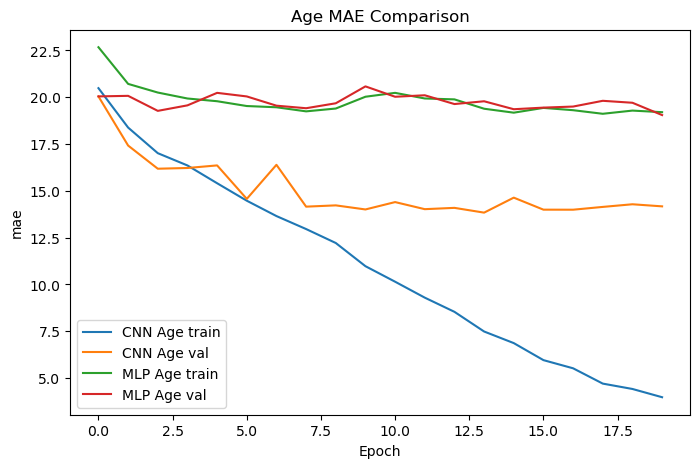

In [23]:
# CNN vs MLP Age
plot_graph([age_history, mlp_age_history],"mae",["CNN Age","MLP Age"],"Age MAE Comparison")


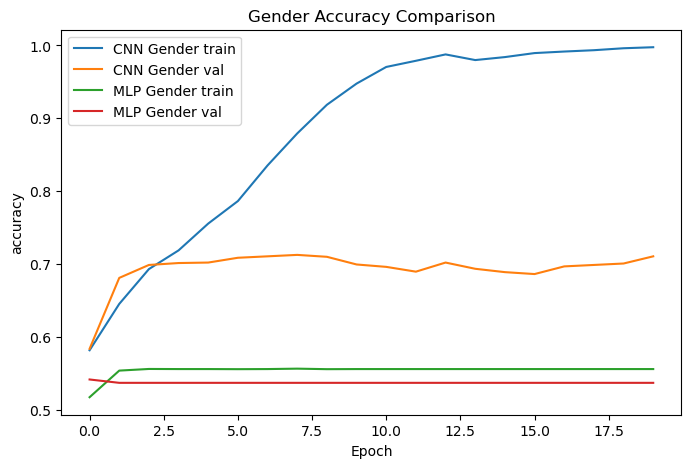

In [24]:
# CNN vs MLP Gender
plot_graph([gender_history, mlp_gender_history],"accuracy",["CNN Gender","MLP Gender"],"Gender Accuracy Comparison")

In [25]:
#Discuss the strengths and weaknesses of each approach in the context of the given tasks. Part 4
# Directly comaring MLP to CNN we can a drastic difference between the two. After 20 epochs in cnn we get a loss value of of 32 and a 99% accuracy.
#However with MLP we get a loss of around 500 with an accurate in around 50%. In turn cnn processed slower (12sec) and provided better results
# were MlP was faster (7sec) with much worse results. 

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


Text(0.5, 1.0, 'CNN Gender Confusion Matrix')

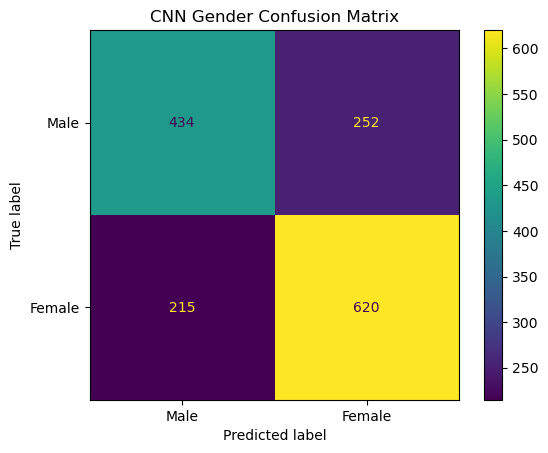

In [26]:
# Confusion Matrices CNN - Gender
y_pred_g_cnn = (gender_model.predict(X_test) >= 0.5).astype(int).flatten()
cm_g_cnn = confusion_matrix(gender_test, y_pred_g_cnn)
_ = ConfusionMatrixDisplay(cm_g_cnn, display_labels=['Male','Female']).plot()
plt.title("CNN Gender Confusion Matrix")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Text(0.5, 1.0, 'MLP Gender Confusion Matrix')

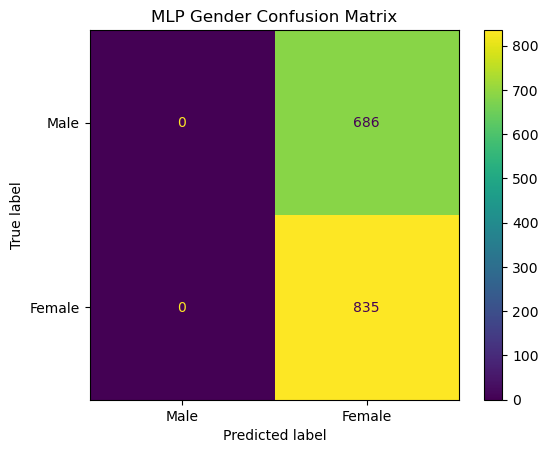

In [27]:
# Confusion Matrices MLP - Gender
y_pred_g_mlp = (mlp_gender_model.predict(X_test_flat) >= 0.5).astype(int).flatten()
cm_g_mlp = confusion_matrix(gender_test, y_pred_g_mlp)
_ = ConfusionMatrixDisplay(cm_g_mlp, display_labels=['Male','Female']).plot()
plt.title("MLP Gender Confusion Matrix")


In [28]:
#Discuss the overall performance of the models and potential improvements.

# Over all the cnn is the better model to go with in our scenario, despite the slightly longer amount of time per epoch. MLP should not be used
# as we can see that the confusion matrix highlights that the MLP model learned to only answer with female when asked to predict the gender.
# not once does it attempt to guess male, leading to the 50% accuracy rating. This skew occurs since the data set includes a disproprtionate 
# amount of females compared to male.